# Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

### Import library

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Read data

In [23]:
df = pd.read_csv('HR_comma_sep.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data exploration and visualization

In [36]:
df[df['left'] == 1].shape[0]

3571

In [38]:
df[df['left'] == 0].shape[0]

11428

In [40]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


* **Satisfaction_Level** : employees who left the company had lower satisfaction level.
* **Average_Monthly_Hours** : employees who left the company works more hours than who stayed.
* **Promotion_last_5years** : employees who got promoted will tend to stay in the company.

<AxesSubplot: xlabel='salary', ylabel='count'>

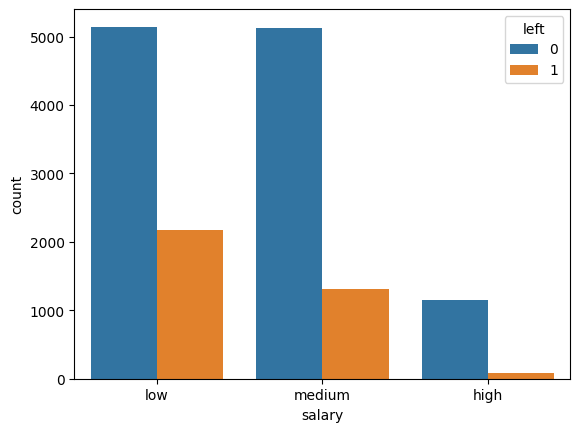

In [49]:
sns.countplot(data=df, x='salary', hue='left')

* **Employees have higher salary tend to not leaving the company**

<AxesSubplot: xlabel='Department', ylabel='count'>

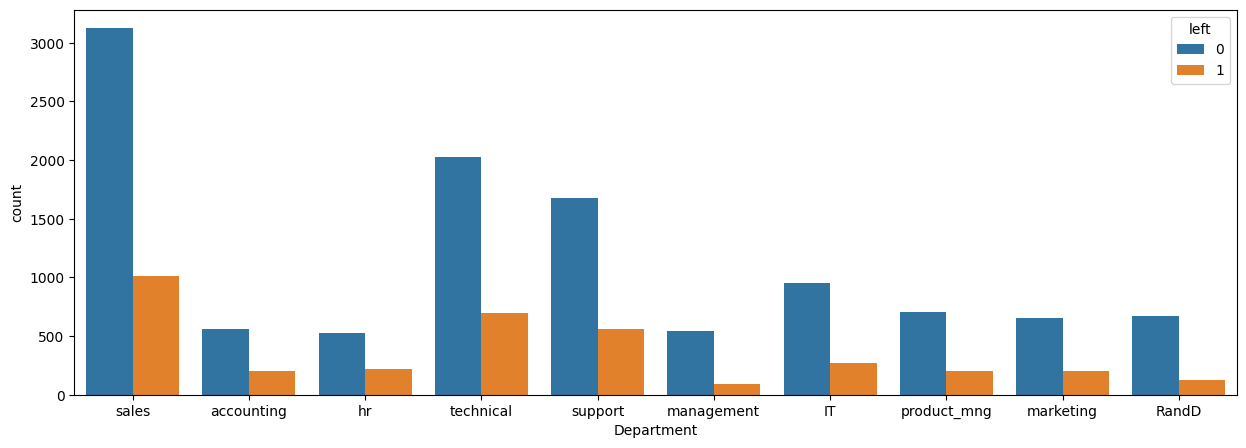

In [48]:
plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='Department', hue='left')

* **There are some factors impact the result in Sales department**

### Preprocessing data

We will choose the following features to train the model
* **Satisfaction_Level**
* **Average_Monthly_Hours**
* **Promotion_last_5years**
* **Salary**

In [77]:
new_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]

new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [78]:
salary_dummies = pd.get_dummies(data=new_df['salary'], prefix='salary')

In [79]:
new_df_dummies = pd.concat([new_df, salary_dummies], axis='columns')

new_df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [80]:
new_df_dummies.drop('salary', axis='columns', inplace=True)

new_df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [81]:
X = new_df_dummies
y = df.left

### Train the model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [88]:
model.score(X_test, y_test)

0.7733333333333333